# IMPORT LIBRARIES

In [1]:
# Importing necessary libraries
import pandas as pd   # For data manipulation
import numpy as np    # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced data visualization
from surprise import SVD, KNNBasic, Dataset, Reader  # For collaborative filtering and data handling
from surprise.model_selection import train_test_split  # For splitting data into training and testing sets
from surprise.accuracy import rmse  # For evaluating the model

# LOAD DATA

In [2]:
data=pd.read_csv('Amazonproducts.csv')
data

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
59995,A3DX6U1B9KDUW4,B00004WHSD,1.0,1121385600
59996,A1BCHEPYUNRLJ,B00004WHSD,5.0,1009152000
59997,A1RLVKQQWHOQAW,B00004WHSD,5.0,984355200
59998,A3T9DOOJ5B1U7O,B00004WHV7,5.0,1014249600


# PREPROCESS DATA

In [3]:
data=pd.read_csv('Amazonproducts.csv',names=['userId', 'productId','Rating','timestamp'])
data=data.iloc[:60000,:] # Selecting a subset of the data for efficiency
data.to_csv('Amazonproducts.csv', index=False) # Saving the preprocessed data
data

,userId,productId,Rating,timestamp
0,userId,productId,Rating,timestamp
1,AKM1MP6P0OYPR,0132793040,5.0,1365811200
2,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
3,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
4,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
...,...,...,...,...
59995,AJLBSZDI3SFHP,B00004WHS4,4.0,982195200
59996,A3DX6U1B9KDUW4,B00004WHSD,1.0,1121385600
59997,A1BCHEPYUNRLJ,B00004WHSD,5.0,1009152000
59998,A1RLVKQQWHOQAW,B00004WHSD,5.0,984355200


# EDA

In [4]:
data.head()

,userId,productId,Rating,timestamp
0,userId,productId,Rating,timestamp
1,AKM1MP6P0OYPR,0132793040,5.0,1365811200
2,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
3,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
4,A2WNBOD3WNDNKT,0439886341,3.0,1374451200


In [5]:
data.tail()

,userId,productId,Rating,timestamp
59995,AJLBSZDI3SFHP,B00004WHS4,4.0,982195200
59996,A3DX6U1B9KDUW4,B00004WHSD,1.0,1121385600
59997,A1BCHEPYUNRLJ,B00004WHSD,5.0,1009152000
59998,A1RLVKQQWHOQAW,B00004WHSD,5.0,984355200
59999,A3T9DOOJ5B1U7O,B00004WHV7,5.0,1014249600


In [6]:
data.shape

(60000, 4)

In [7]:
data.dtypes

userId       object
productId    object
Rating       object
timestamp    object
dtype: object

In [8]:
print("Number of Rating: {}".format(data.shape[0]) )
print("Columns: {}".format( np.array2string(data.columns.values)) )
print("Number of Unique Users: {}".format(len(data.userId.unique()) ) )
print("Number of Unique Products: {}".format(len(data.productId.unique())  ) )

Number of Rating: 60000
Columns: ['userId' 'productId' 'Rating' 'timestamp']
Number of Unique Users: 55334
Number of Unique Products: 4141


In [9]:
print(data['Rating'].dtype)

object


In [10]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

In [11]:
data.describe()['Rating']

count    59999.000000
mean         4.052334
std          1.338564
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [12]:
print(f'Minimum rating is: {data.Rating.min()}')
print(f'Maximum rating is: {data.Rating.max()}')

Minimum rating is: 1.0
Maximum rating is: 5.0


In [13]:
print('Number of missing values in data: \n',data.isnull().sum())

Number of missing values in data: 
 userId       0
productId    0
Rating       1
timestamp    0
dtype: int64


Text(0, 0.5, 'RATINGS COUNT')

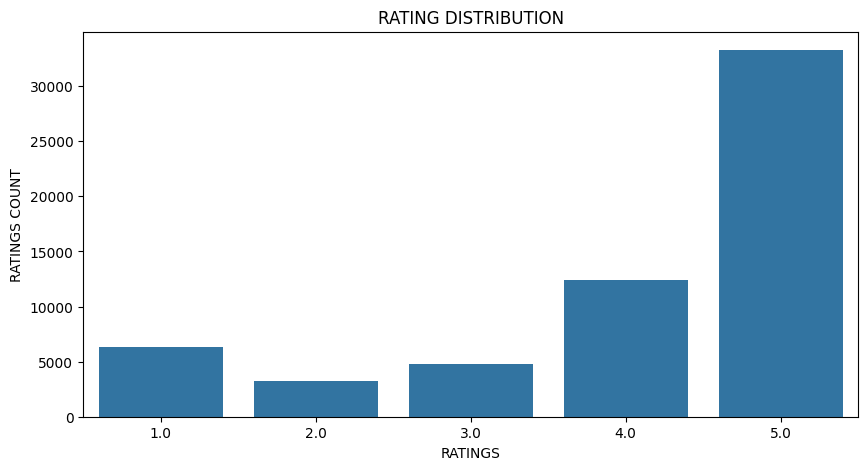

In [14]:
# Analyzing the distribution of ratings
plt.figure(figsize=(10,5))
ratings = data['Rating'].value_counts()
sns.barplot(x=ratings.index, y=ratings.values)
plt.title('RATING DISTRIBUTION')
plt.xlabel('RATINGS')
plt.ylabel('RATINGS COUNT')

In [15]:
no_of_rated_products_per_user = data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head(25)

userId
A231WM2Z2JL0U3    45
AY8Q1X7G96HV5     34
A2BGZ52M908MJY    33
A1NVD0TKNS1GT5    25
A1MJMYLRTZ76ZX    22
A3MEIR72XKQY88    22
A1RPTVW5VEOSI     22
ALUNVOQRXOZIA     21
A243HY69GIAHFI    20
A6FIAB28IS79      17
A23ZO1BVFFLGHO    17
A1ISUNUWG0K02V    16
A3IBOQ8R44YG9L    15
A7Y6AVS576M03     15
A3FTI86WAVJOLG    14
A1WVMDRJU19AFD    14
A2B7BUH8834Y6M    13
A2M5GKAGV88LWD    13
A3A15L96IYUO6V    13
ARXU3FESTWMJJ     13
A2G2QNKDL1Y6AC    13
A6ZPLVAUQ6695     13
AD50TWQOM8W4G     12
A3PLX6PTM2ERKL    11
AEE2GJR0VF6R7     11
Name: Rating, dtype: int64

In [16]:
t2data_product_ratings =pd.DataFrame(data.groupby('userId')['Rating'].mean())
t2data_product_ratings['ratings_count'] = pd.DataFrame(data.groupby('userId')['Rating'].count())
t2data_product_ratings.head()

,Rating,ratings_count
userId,,
A001944026UMZ8T3K5QH1,1.0,1
A00766851QZZUBOVF4JFT,5.0,1
A01255851ZO1U93P8RKGE,5.0,1
A014623426J5CM7M12MBW,5.0,1
A01580702BRW77PSJ9X34,1.0,1


In [17]:
t2data_product_ratings['score'] = t2data_product_ratings['Rating']*t2data_product_ratings['ratings_count']

<Figure size 800x600 with 0 Axes>

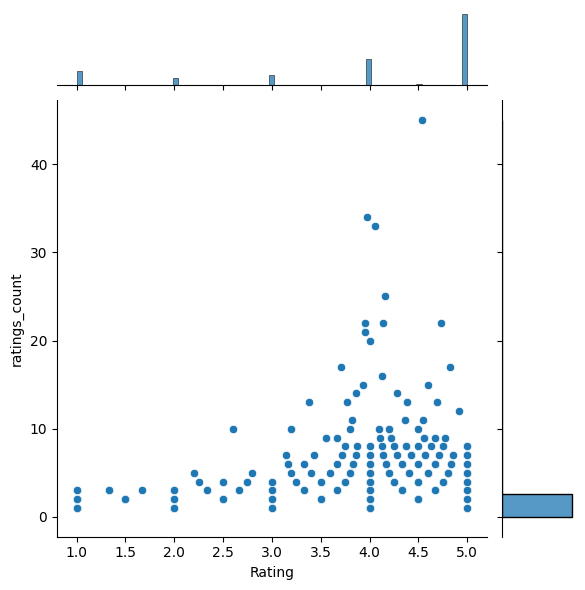

In [18]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Rating', y='ratings_count', data=t2data_product_ratings)

# DROP TIMESTAMP

In [19]:
data.drop(['timestamp'], axis=1,inplace=True)

In [20]:
data

,userId,productId,Rating
0,userId,productId,NaN
1,AKM1MP6P0OYPR,0132793040,5.0
2,A2CX7LUOHB2NDG,0321732944,5.0
3,A2NWSAGRHCP8N5,0439886341,1.0
4,A2WNBOD3WNDNKT,0439886341,3.0
...,...,...,...
59995,AJLBSZDI3SFHP,B00004WHS4,4.0
59996,A3DX6U1B9KDUW4,B00004WHSD,1.0
59997,A1BCHEPYUNRLJ,B00004WHSD,5.0
59998,A1RLVKQQWHOQAW,B00004WHSD,5.0


# POPULARITY BASED METHOD

In [21]:
new_df=data.groupby("productId").filter(lambda x:x['Rating'].count() >=2)

In [22]:
new_df

,userId,productId,Rating
3,A2NWSAGRHCP8N5,0439886341,1.0
4,A2WNBOD3WNDNKT,0439886341,3.0
5,A1GI0U4ZRJA8WN,0439886341,1.0
6,A1QGNMC6O1VW39,0511189877,5.0
7,A3J3BRHTDRFJ2G,0511189877,2.0
...,...,...,...
59994,AUU9FAUKPZHV8,B00004WHS4,2.0
59995,AJLBSZDI3SFHP,B00004WHS4,4.0
59996,A3DX6U1B9KDUW4,B00004WHSD,1.0
59997,A1BCHEPYUNRLJ,B00004WHSD,5.0


In [23]:
new_df.groupby('productId')['Rating'].mean().head()

productId
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
059400232X    5.000000
0594012015    2.000000
Name: Rating, dtype: float64

In [24]:
new_df.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B00002EQBR    5.0
9983782030    5.0
B00004VVUQ    5.0
9984971805    5.0
B00004T1XJ    5.0
Name: Rating, dtype: float64

In [25]:
new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

productId
B00001P4ZH    2075
B00004T8R2    1692
B00001WRSJ    1586
0972683275    1051
B00004SABB    1030
Name: Rating, dtype: int64

In [26]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())

In [27]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())

In [28]:
ratings_mean_count.head()

,Rating,rating_counts
productId,,
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27
059400232X,5.000000,3
0594012015,2.000000,8


<Axes: xlabel='productId'>

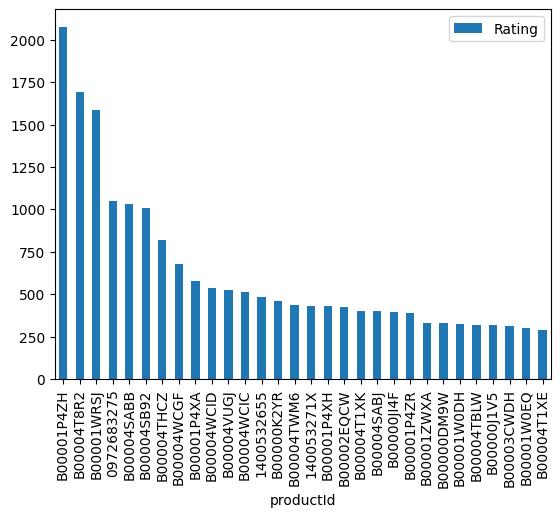

In [29]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

<Axes: xlabel='productId'>

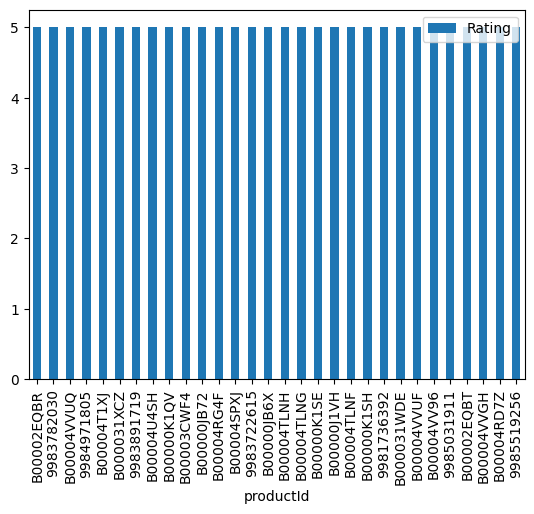

In [30]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

# Collaberative filtering (Item-Item recommedation)

In [31]:
#pip install scikit-surprise

In [32]:
from surprise import SVD,  SlopeOne
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore

from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [33]:
# Preparing the data for the Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [34]:
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

# MEMORY BASED

In [35]:
bsl_options = {'method': 'als', 'n_epochs': 5, 'reg_u': 12, 'reg_i': 5 }
sim_options={'name': 'pearson_baseline', 'user_based': False}

In [36]:
algo_KNNBasic = KNNBasic(k=5,sim_options = sim_options , bsl_options = bsl_options)
predictions_KNNBasic = algo_KNNBasic.fit(trainset).test(testset)
rmse_KNNBasic = accuracy.rmse(predictions_KNNBasic)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3388


# CREATE UNIQUE USER AND PRODUCTS

In [37]:
all_user_ids = list(new_df['userId'].unique())
all_products = list(new_df['productId'].unique())
all_products[:10]

['0439886341',
 '0511189877',
 '0528881469',
 '059400232X',
 '0594012015',
 '0594033896',
 '0594033926',
 '0594033934',
 '0594296420',
 '0594450209']

# CHOOSE ONE USER

In [38]:
len(all_user_ids)

54245

In [39]:
user_index = 200
uid = all_user_ids[user_index]
print("User choosen to generate recommendation list is " + str(uid))

User choosen to generate recommendation list is A3PRSCGIX3NY0X


In [40]:
items_purchased = trainset.ur[trainset.to_inner_uid(uid)]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]:
    print(algo_KNNBasic.trainset.to_raw_iid(items))



#getting K Neareset Neighbors for first item purchased by the choosen user
KNN_Product = algo_KNNBasic.get_neighbors(items_purchased[0][0], 15)

recommendedation_lits = []
for product_iid in KNN_Product:
    if not product_iid in items_purchased[0]: #user already has purchased the item
        purchased_item = algo_KNNBasic.trainset.to_raw_iid(product_iid)
        recommendedation_lits.append(purchased_item)
print("Recommended items for user " + str(uid) + " by KNNBasic \n"  , recommendedation_lits)

Choosen User has purchased the following items 
0972683275
B00004TDN2
Recommended items for user A3PRSCGIX3NY0X by KNNBasic 
 ['B00004T8R2', '9985511476', 'B00001W0EQ', 'B00000K3RK', 'B00004RJZG', 'B00001W0DH', 'B00000K2YR', 'B00004WCGF', 'B00000JSEQ', 'B00000J1SC', 'B000021YTD', 'B00004WCIC', 'B00004WGNF', 'B00002MZ8G']


In [41]:
df_predictions_KNNBasic = pd.DataFrame(predictions_KNNBasic, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions_KNNBasic['err'] = abs(df_predictions_KNNBasic.est - df_predictions_KNNBasic.rui)

In [42]:
best_predictions = df_predictions_KNNBasic.sort_values(by='err')[:10]
worst_predictions = df_predictions_KNNBasic.sort_values(by='err')[-10:]

In [43]:
best_predictions

,uid,iid,rui,est,details,err
8595,A26D3NDNGDLIC4,B00004TDN4,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}",0.0
6194,A2HLQAETMSO4Q8,B00001P505,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}",0.0
6196,A1Q29INJ9IN570,B00004SB92,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",0.0
3227,A105GWGM7PDAI2,B00003G1RG,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",0.0
11027,A2K5FK58JSWXJ9,B00004S9AK,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",0.0
6300,A2G9NNSRTX8HMW,B00004T8R2,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",0.0
14147,A14JBDSWKPKTZA,B00003006R,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",0.0
15210,A1ISUNUWG0K02V,B00004RC2D,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}",0.0
14132,A1HMQHPNK3VVTU,B00004SCKA,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",0.0
4821,A3EPOKANU798QW,B00004TL5Q,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",0.0


In [44]:
worst_predictions

,uid,iid,rui,est,details,err
10164,A1N7Q1NR7ELYCY,1400599997,1.0,4.057179,"{'was_impossible': True, 'reason': 'User and/o...",3.057179
14650,A1NVS98O96RHMX,B00004VVUN,1.0,4.057179,"{'was_impossible': True, 'reason': 'User and/o...",3.057179
2820,A2G0O4Y8QE10AE,B00000J1TS,1.0,4.057179,"{'was_impossible': True, 'reason': 'Not enough...",3.057179
7093,A2PGQ584ZF9B3F,B00000K4KH,1.0,4.057179,"{'was_impossible': True, 'reason': 'User and/o...",3.057179
10154,A18BX7HMYDZ7IP,B000028F42,1.0,4.057179,"{'was_impossible': True, 'reason': 'User and/o...",3.057179
8182,A1YF0SKMGV2BIL,B00001P4ZH,5.0,1.000000,"{'actual_k': 1, 'was_impossible': False}",4.000000
3748,ABIU9UY9J2CAS,B000031KIM,5.0,1.000000,"{'actual_k': 1, 'was_impossible': False}",4.000000
6029,A2E7WCIG181AMI,B00004TWVY,1.0,5.000000,"{'actual_k': 1, 'was_impossible': False}",4.000000
15043,ALUNVOQRXOZIA,B00004SB92,1.0,5.000000,"{'actual_k': 1, 'was_impossible': False}",4.000000
12690,A3KN2OBPZ6QJLF,B00001P4ZH,1.0,5.000000,"{'actual_k': 1, 'was_impossible': False}",4.000000


In [45]:
import pickle

with open('knnbasic_model.pkl', 'wb') as f:
    pickle.dump(algo_KNNBasic, f)